## <font color=#0000FF>程式作業五</font>
1. **繳交期限為<font color=#FF6600> 2022/01/03 12:00</font> 以前上傳至 Moodle LMS 教學平台。**
2. **上傳作業時，必須完成以下幾件事：**
    * **將目前您所看到的此檔案(hw4.ipynb)，改為(<font color=#FF00FF>您的學號</font><font color=#0000FF>_hw5.ipynb</font>)。**
    * **建立一個全新的資料夾，將上述作業檔案置入，並將資料夾的名稱改為<font color=#FF00FF>您的學號</font>。**
    * **將上述包含作業的資料夾以 <font color=#FF0000>ZIP</font> 格式壓縮後上傳。**

3. **<font color=#FF0000>注意事項：所有程式作業應積極相互討論，但不得寫出同一版本或相互抄襲。您所完成繳交的作業是否有抄襲由評分的助教自行判斷，不會找您來確認，因為不會有兩個人會寫出相同的程式！所以強烈建議不要任意將自己已經完成的作業程式碼公開分享給其他同學。</font>**
4. **評分：**
    1. **共有六題，除第一題佔<font color=#0000FF> 25 分</font>以外，其餘每一題佔<font color=#0000FF> 15 分</font>。**
    2. **評分依據：程式的輸出入格式與內容<font color=#0000FF> (10%) </font>程式執行正確性<font color=#0000FF> (80%)</font>。**
    3. **本次作業只需要在每一行的指令處，盡可能的撰寫註解，占評分的<font color=#0000FF> (10%)</font>。**


### <font color=#FF6600>作業內容</font>

### 撰寫程式讀取個人資訊與收入數據集「adult.csv」，共有 15 個特徵與 32,561 筆樣本，欄位的說明如下：

| 欄 位 | 說 明 |
| :-- | :-- |
| age | 年齡 |
|  workclass   |  工作類型，共 8 種    |
|fnlwgt|權重，代表人口普查認為這筆觀測代表的人數|
|education|教育程度，共 16 種|
|education-num|學歷數值資料（1~16）|
|marital-status|婚姻狀態，共 7 種|
|occupation|產業類別，共 14 種|
|relationship|家庭成員，共 6 種|
|race|種族，共 5 種|
|sex|性別，共 2 種|
|capital-gain|資本收益（0 ~ 99999）|
|capital-loss|資本損失（0 ~ 4356）|
|hours-per-week|每週工時（1 ~ 99）|
|native-country|國籍|
|income|收入，共 2 種（<= 50K, > 50K）|

### 本次作業的目標是<font color=blue>建立一個邏輯斯迴歸模型，來預測收入是否超過 5 萬美金</font>，並依序完成以下六個小題的要求。

In [1]:
#開啟檔案
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore')

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

df = pd.read_csv("adult.csv", encoding = "big5")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### P1
**進行探索式分析瀏覽數據集，必須包括以下資訊：**
1. **描述表格內數據量的 shape 大小。**
1. **計算表格內資料遺漏值的數量。**
1. **計算表格內「income」特徵內 <= 50K 以及 > 50K 的個數。**
1. **顯示表格內所有特徵的基礎統計分析表，本表格必須完整呈現所有資訊，不可以只呈現部份資訊。**
1. **繪出表格內所有特徵彼此之間相關性的熱區圖。**
**以上每一項的要求請分別在單獨的 cell 中完成並顯示結果。**

In [2]:
df.shape

(48842, 15)

In [3]:
import numpy as np
df.replace("?",np.nan,inplace=True)
#將資料內 ?遺漏值 改為 nan
print(df.isna().sum())
#isna()，遺漏值會顯示為True，用sum()計算多少True

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [4]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

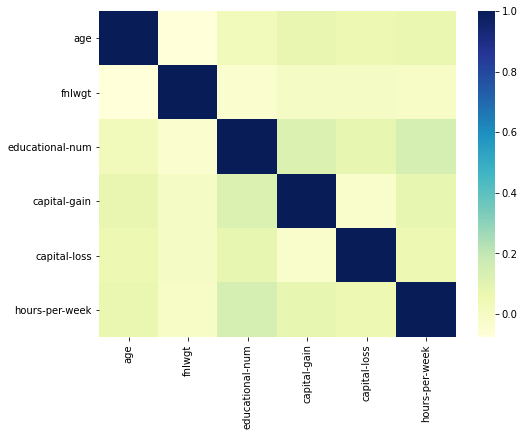

In [6]:
df_pd = df.corr() #先算出資料間彼此的相關係數
#使用seaborn做視覺化
import seaborn as sns
import matplotlib.pyplot as plt
# 指定畫幅
plt.figure(figsize=(8,6))
# 繪製熱力圖
sns.heatmap(df_pd, cmap='YlGnBu')

#### P2
**將「income」特徵內所有的「<= 50K」修改為 0，以及所有的「> 50K」修改為 1，完成後請再一次計算表格內「income」特徵內 0 與 1 的個數，並將結果列印出來。**

In [7]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [8]:
#==定義X和y值

X=df.iloc[:,:-1]

#從df.describe() 可看出75%以上的人是没有資本收益和資本損失的，
#education和education-num兩個變量的值是對應的，權重(fnlwgt)也不重要，以上四個可以刪除。
X.drop('fnlwgt',axis=1, inplace=True)         #fnlgwt
X.drop('education',axis=1, inplace=True)      #Education
X.drop('capital-gain',axis=1, inplace=True)   #Capital Gain
X.drop('capital-loss',axis=1, inplace=True)   #Capital Loss

y=df['income']


# ==遺漏值處理，用眾數替換法（mode（）方法取眾數）
X.fillna(value={
    'workclass':X['workclass'].mode()[0],   #Workclass
    'occupation':X['occupation'].mode()[0],   #Occupation  
    'native-country':X['native-country'].mode()[0]}, #Native country
     inplace = True)  

In [9]:
#使用數字替換字串型態資料
cols=['workclass','marital-status', 'occupation',
       'relationship', 'race', 'gender','native-country'
     ]
for col in cols:   #循環修改字串類型的數組
    u=X[col].unique() #為當前循環的數组加上索引
    
    def convert(item):
        return np.argwhere(u==item)[0,0] #返回 u中的數據=x的索引數組
    X[col]=X[col].map(convert)     # 索引替換資料
X.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,0,7,0,0,0,0,0,40,0
1,38,0,9,1,1,1,1,0,50,0
2,28,1,12,1,2,1,1,0,40,0
3,44,0,10,1,0,1,0,0,40,0
4,18,0,10,0,3,0,1,1,30,0


#### P3
**將數據集分為訓練集與測試集，其中測試集占 20%，分別列印出訓練集與測試集的 shape。**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# X_train, y_train -> 訓練集與其類別標籤(比例 = 0.8)
# X_test, y_test   -> 測試集與其類別標籤(比例 = 0.2)

#feature,target,test_size=0.2 特徵值 、目標值、測試集占比 1:4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

# .shape看切出來的資料長相（列, 欄）
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(39073, 10)
(9769, 10)
(39073,)
(9769,)


#### P4
**建立多項式迴歸模型並擬和訓練集。**

In [14]:
from sklearn.preprocessing import PolynomialFeatures

#  建構模型 -- 模型
poly = PolynomialFeatures()  #多項式特徵
# ==擬和數據
x_train_poly = poly.fit_transform(X_train)
reg =LogisticRegression(solver = 'lbfgs', multi_class = 'auto') 

reg.fit(x_train_poly,y_train)

# 使用測試數據進行回歸預測
y_test_predict = reg.predict(poly.fit_transform(X_test))
# 訓練數據的測試值
y_train_predict = reg.predict(x_train_poly)

#### P5
**針對測試集，繪製出其相關的混淆矩陣。**

In [17]:
def plot_confusion_matrix(cm, 
                          classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    
    plt.title(title)
    
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation = 45)
    
    plt.yticks(tick_marks, classes)

    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        
        print("Normalized confusion matrix")
    
    else:
    
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 
                 horizontalalignment = "center",
                 
                 color = "white" if cm[i, j] > thresh else "black")

        
    plt.tight_layout()
    
    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6909  532]
 [1400  928]]


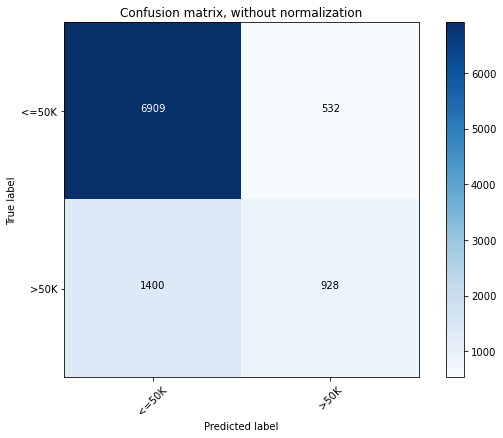

In [18]:
# 計算出 confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix (y_test,y_test_predict)
import itertools

target_names = ['<=50K','>50K']

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

plot_confusion_matrix(cnf_matrix, 
                      classes = target_names, 
                      title = 'Confusion matrix, without normalization', 
                      cmap = plt.cm.Blues)

plt.show()

#### P6
**針對測試集，列印出其相關的混淆矩陣分類報告分析效能。**

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predict, target_names = target_names))

              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88      7441
        >50K       0.64      0.40      0.49      2328

    accuracy                           0.80      9769
   macro avg       0.73      0.66      0.68      9769
weighted avg       0.78      0.80      0.79      9769

